# [파이썬 머신러닝 완벽 가이드] <br>
# 04 분류

## 04-1 분류(Classification)의 개요 <br>
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈 (Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀 (Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리 (Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신 (Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접 (Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망 (Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블 (Ensemble)

### [앙상블 방법 (Ensemble Method)]
- 분류에서 가장 각광을 받는 방법 중 하나로, 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보여줌
- 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨
- 배깅 방식의 대표인 `랜덤 포레스트 (Random Forest)`: 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용함 <br><br>
- 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전 중임
- `그래디언트 부스팅 (Gradient Boosting)`: 뛰어난 예측 성능을 가지고 있지만, 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음
- `XgBoost (eXtra Gradient Boost)`, `LightGBM` 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리 잡음

### [결정 트리]
- 앙상블의 기본 알고리즘으로 일반적으로 사용하는 알고리즘으로, 매우 쉽고 유연하게 적용될 수 있음
- 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
- 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있음
- 앙상블은 매우 많은 여러 개의 약한 학습기 (예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키므로, 위와 같은 단점이 앙상블 기법에서는 오히려 장점으로 작용함

## 04-2 결정 트리 (Decision Tree) <br>
- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동적으로 찾아내 트리 기반의 분류 규칙을 만듦
- 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것임 <br><br>

### [결정 트리의 구조]
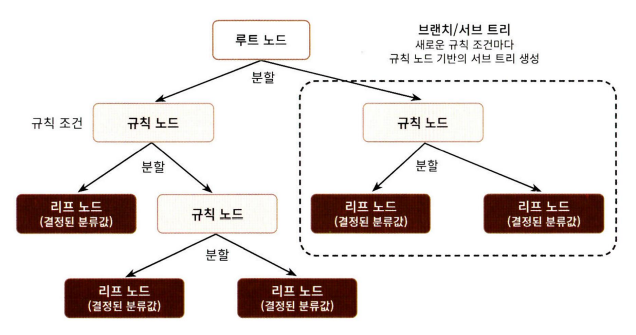 <br>
- 규칙 노드 (Decision Node): 규칙 조건
- 리프 노드 (Leaf Node): 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리 (Sub Tree) 생성
- 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 트리의 깊이(depth)가 깊어질수록 (많은 규칙이 있을수록) 과적합으로 이어지기 쉬우며 결정 트리의 예측 성능이 저하될 가능성이 높음


- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
- 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측함
- 이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 `정보 이득 (Information Gain) 지수`와 `지니 계수`가 있음 <br><br>
- 정보 이득
    - 엔트로피라는 개념을 기반으로 함
    - 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하며, 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮음
    - `정보 이득 지수 = 1 - 엔트로피 지수`
    - 결정 트리는 정보 이득이 높은 속성을 기준으로 분할함
- 지니 계수
    - 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
    - 0이 가장 평등하고 1로 갈수록 불평등함
    - 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함 <br><br>
- 결정 트리 알고리즘을 사이킷런에서 구현한 `DecisionTreeClassifier`은 기본적으로 지니 계수를 이용해 데이터 세트를 분할함
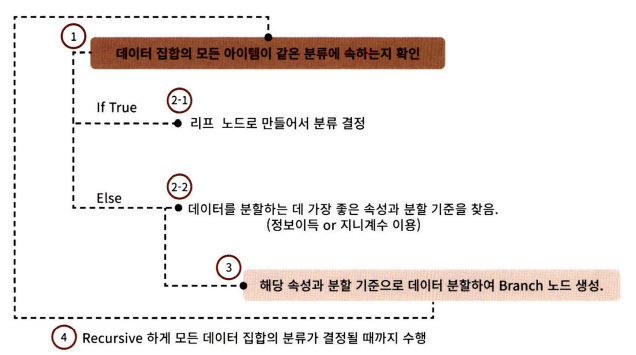

### [결정 트리 모델의 특징]
- 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임
- 룰이 매우 명확하기 때문에 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고 이를 시각화로 표현할 수 있음
- 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 과적합으로 인해 정확도가 떨어진다는 단점이 있으므로 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨

### [결정 트리 파라미터]
- `DecisionTreeClassifier`: 분류를 위한 클래스
- `DecisionTreeRegressor`: 회귀를 위한 클래스 <br><br>

#### 두 클래스의 파라미터
- `min_samples_split`
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용
    - default는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
- `min_samples_leaf` 
    - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
    - min_samples_split과 유사하게 과적합 제어 용도이지만 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우에는 작게 설정 필요
- `max_features`
    - 최적의 분할을 위해 고려할 최대 피처 개수이며 default는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
    - int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
    - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
    - 'auto'로 지정하면 sqrt와 동일
    - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
    - 'None'은 전체 피처 선정
- `max_depth`
    - 트리의 최대 깊이를 규정
    - default는 None이며 None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
    - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- `max_leaf_nodes`
    - 말단 노드(Leaf)의 최대 개수

### [결정 트리 모델의 시각화]
- Graphviz 패키지: 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Claasifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

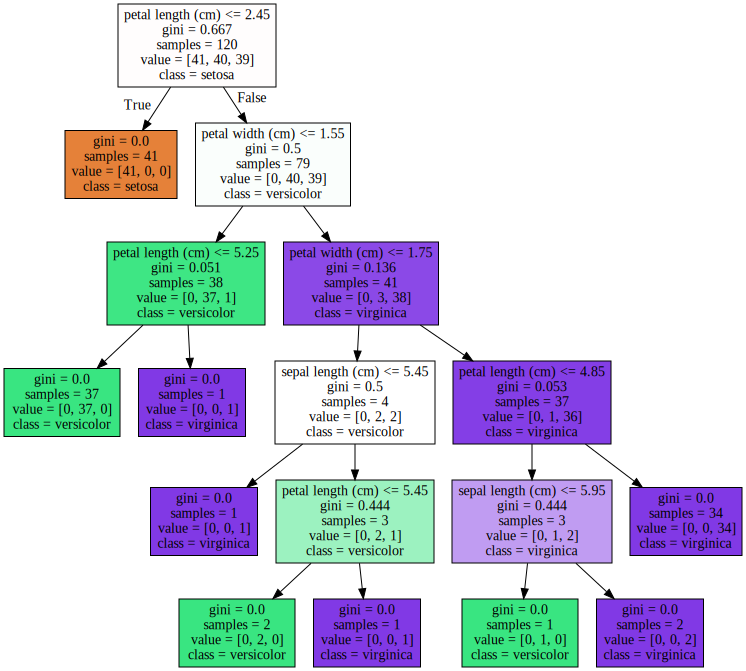

In [3]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### [결정 트리 규칙]
- 리프 노드는 자식 로드가 없는 노드로 최종 클래스(레이블) 값이 결정되는 노드임
- 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
- 브랜치 노드는 자식 노드가 있는 노드임 <br><br>

#### 위 그림에서 노드 내에 기술된 지표의 의미
- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이며 이 조건이 없으면 리프 노드임
- gini는 다음의 value = []로 주어진 데이터 분포에서의 지니 계수임
- samples는 현 규칙에 해당하는 데이터 건수임
- value = []는 클래스 기반의 데이터 건수로 붓꽃 데이터 세트는 클래스 값으로 0(Setosa),1(Versicolor),2(Virginica)를 가지고 있으며 만일 Value = [41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성되어 있다는 의미임
- 각 노드의 색깔은 붓꽃 데이터의 레이블 값으로 주황색은 0(Setosa), 초록색은 1(Versicolor), 보라색은 2(Virginica) 레이블을 나타냄
- 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot:>

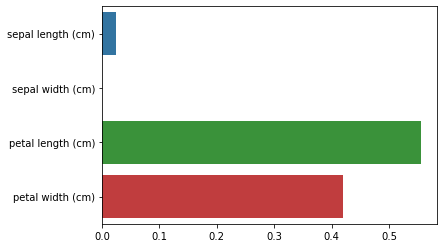

In [4]:
import seaborn as sns
import numpy as np

#feature importance 추출 (feature importance값이 높을수록 해당 피처의 중요도가 높음)
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name,value))
    
#feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### [결정 트리 과적합 (Overfitting)]

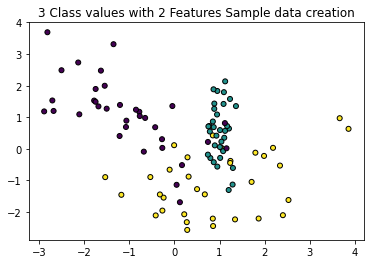

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

## 04-3 앙상블 학습 <br>
### [앙상블 학습 개요] <br>
- 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식임
- 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기가 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것임
- 대표적인 배깅 방식이 랜덤 포레스트 알고리즘임 <br>
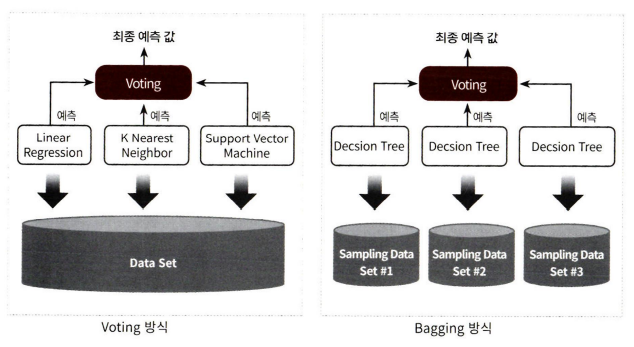 <br>
- `보팅`은 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식임
- 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 부름
- `배깅 앙상블 방식`은 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식임
- 교차 검증은 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용함
- `부스팅`은 여러 개의 분류기가 순차적으로 학습을 수행하되 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)을 부여하면서 학습과 예측을 진행하는 것임
- 부스팅은 예측 성능이 뛰어나 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)이 있음
- `스태킹`은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법임

### [보팅 유형 - 하드 보팅 (Hard Voting)과 소프트 보팅 (Soft Voting)] <br>
- `하드 보팅`: 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정함
- `소프트 보팅`: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정함
- 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 소프트 보팅이 보팅 방법으로 적용됨 <br>
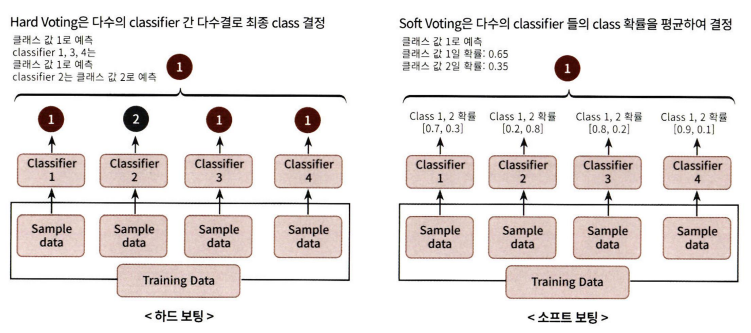

### [보팅 분류기 (Voting Classifier)]

In [6]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [7]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


## 04-4 랜덤 포레스트 <br>
### [랜덤 포레스트의 개요 및 실습] <br>
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며, 다양한 영역에서 높은 예측 성능을 보임
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함 <br>
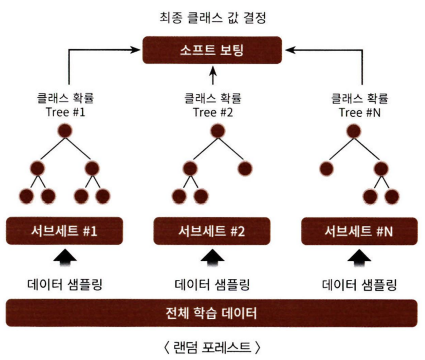 <br>
- 부트스트래핑 (Bootstrapping): 여러 개의 데이터 세트를 중첩되게 분리하는 것
- 배깅 (Bagging): Bootstrap aggregating
- 랜덤 포레스트의 서브세트(Subset) 데이터는 이러한 부트스트래핑으로 데이터가 임의로 만들어지며, 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩되어 만들어짐 <br>
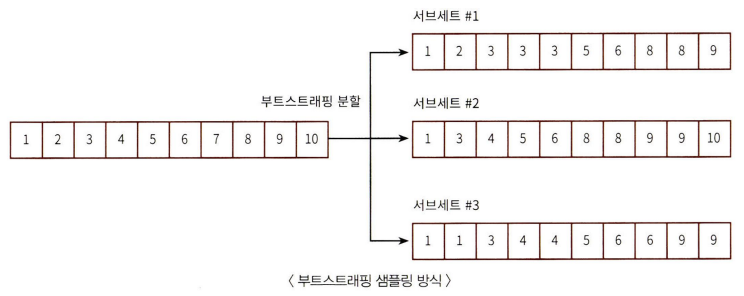

In [8]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df
    
def get_human_dataset():
    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv("C:/Users/kimhj/Desktop/ESAA/Data/UCI HAR Dataset/UCI HAR Dataset/features.txt", sep='\s+', header=None, names=['column_index','column_name'])
    
    #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩하고 칼럼명은 feature_name 적용
    X_train = pd.read_csv("C:/Users/kimhj/Desktop/ESAA/Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", sep='\s+', names=feature_name)
    X_test = pd.read_csv("C:/Users/kimhj/Desktop/ESAA/Data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep='\s+', names=feature_name)
    
    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv("C:/Users/kimhj/Desktop/ESAA/Data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv("C:/Users/kimhj/Desktop/ESAA/Data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", sep='\s+', header=None, names=['action'])
    
    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### [랜덤 포레스트 하이퍼 파라미터 및 튜닝] <br>
- `n_estimators`: 랜덤 포레스트에서 결정 트리의 개수를 지정하며 default는 10개임. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아님. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함
- `max_features`는 결정 트리에 사용된 max_features 파라미터와 같음. 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같음. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조함
- `max_depth`나 `min_samples_leaf`와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행 (n_jobs=-1: 모든 CPU 코어를 이용해 학습)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [11]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


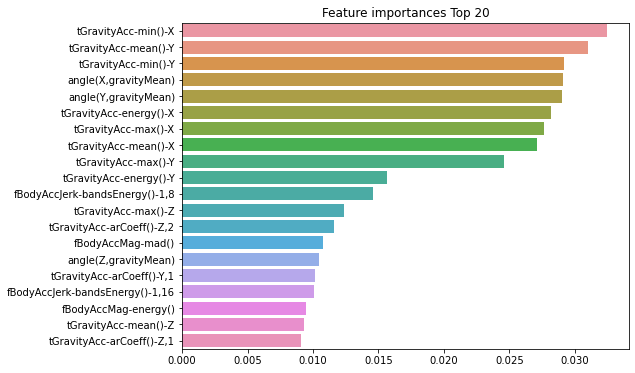

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 04-5 GBM (Gradient Boosting Machine) <br>
### [GBM의 개요 및 실습] <br>
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식임
- AdaBoost (에이다 부스트, Adaptive boosting): 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘 <br>
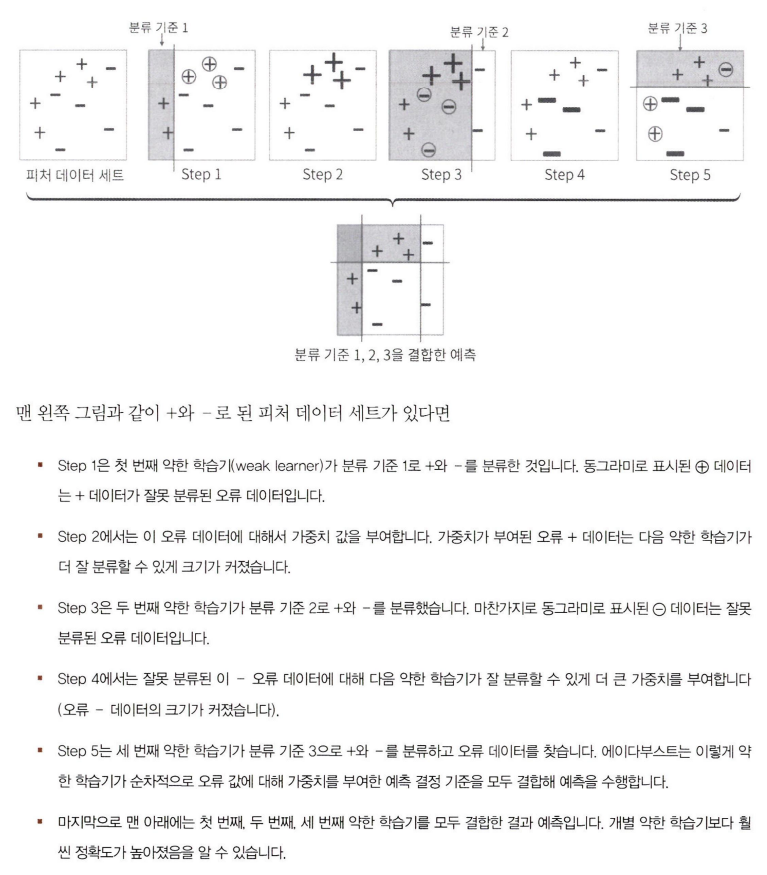 <br>
- GBM (Gradient Boost Machine): 에이다 부스트와 유사하지만 가중치 업데이트를 경사 하강법 (Gradient Descent)을 이용하며 분류와 회귀 모두 가능함

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 735.1초


일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많지만, 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함

### [GBM 하이퍼 파라미터 및 튜닝] <br>
- `loss`: 경사 하강법에서 사용할 비용 함수를 지정함. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용함
- `learning_rate`: GBM이 학습을 진행할 때마다 적용하는 학습률임. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수로 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1임. 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값ㅇ르 찾아 예측 성능이 높아질 가능성이 높음. 많은 weak learner은 순차적인 반복이 필요해서 수행 시간이 오래 걸리고 또 너무 작게 설정하면 모든 weak learner의 반복이 완료되어도 최소 오류 값을 찾지 못할 수 있음. 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만 빠른 수행이 가능함. 이러한 특성 때문에 learning_rate은 n_estimators와 상호 보완적으로 조합해 사용함. learning_rate을 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음. 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며 예측 성능 역시 현격히 좋아지지는 않음.
- `n_estimators`: weak learner의 개수임. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음. 하지만 개수가 많을수록 수행 시간이 오래 걸림. 기본값은 100임
- `subsample`: weak learner가 학습에 사용하는 데이터의 샘플링 비율임. 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 의미임. (0.5면 학습 데이터의 50%) 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정함

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 115.7min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9011


In [15]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9420
